In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
%matplotlib inline


In [12]:
# Define which data you (the user) wants to visualise
# detail and traffic_info can be either 'high' or 'low'

roadId = input('Please write the Road ID: ')
detail = input('Select road detail: high or low: ')
traffic_info = input('Select traffic detail: high or low: ')


Please write the Road ID: N1
Select road detail: high or low: low
Select traffic detail: high or low: high


In [13]:
# Plot overall vulnerability, Condition of bridge(s) and traffic density per type of truck

def plot_vulnerability_detailed(segments,HeavyTrucks,MediumTrucks,SmallTrucks,Economic,A,B,C,D,bridges):
    
    number_segments = len(segments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = np.array(HeavyTrucks)
    y3 = np.array(MediumTrucks)
    y4 = np.array(SmallTrucks)
    
    xmin = x.min()
    xmax = x.max()
    
    y2min = y2.min()
    y3min = y3.min()
    y4min = y4.min()
    ymin = min(y2min,y3min,y4min)
    
    y2max = y2.max()
    y3max = y3.max()
    y4max = y4.max()
    ymax = max(y2max,y3max,y4max)
    
    width = 1
    bottom1 = A
    bottom2 = []
    for i in range(len(A)):
        bot = A[i]+B[i]
        bottom2.append(bot)
    bottom3 = []
    for i in range(len(A)):
        bot = A[i]+B[i]+C[i]
        bottom3.append(bot)
    
    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(15, 8))
    gs = gridspec.GridSpec(3, 1, height_ratios=[5,1,3]) 
    
    ax0 = plt.subplot(gs[0])
    ax0.plot(x, y2, label = 'HeavyTrucks', color = 'blue')
    ax0.plot(x, y3, label = 'MediumTrucks', color = 'black')
    ax0.plot(x, y4, label = 'SmallTrucks', color = 'purple')
    ax1 = plt.subplot(gs[1])
    p1 = ax1.bar(x, A, width = 1, color='green', label = 'A', align = 'edge')
    p2 = ax1.bar(x, B, width = 1, bottom=bottom1, color = 'yellow', label = 'B', align = 'edge')
    p3 = ax1.bar(x, C, width = 1, bottom=bottom2, color = 'orange', label = 'C', align = 'edge')
    p4 = ax1.bar(x, D, width = 1, bottom=bottom3, color = 'red', label = 'D', align = 'edge')
   
    ax2 = plt.subplot(gs[2])
    p5 = ax2.hexbin(x, y1, Economic, gridsize=number_segments-1, cmap='RdYlGn_r')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    ax1.set_title('Bridges in segment per category')
    ax2.set_title('Total vulnerability')
    
    # Change layout
    fig.subplots_adjust(hspace=0.25, left=0.07, right=0.93)
    
    ax0.axis([xmin, xmax, 0, ymax+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    ax1.axis([xmin, xmax, 0,bridges])
    ax1.get_xaxis().set_visible(False)
    ax1.set_frame_on(True)
    ax1.legend(bbox_to_anchor=(1.05, 1.2), loc=1, borderaxespad=0.)
    ax1.get_yaxis().set_ticks([0,bridges])
    ax2.axis([xmin, xmax, 0.9999, 1.0001])
    ax2.get_yaxis().set_visible(False)
    ax2.set_frame_on(True)
                                
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 150:
        plt.xticks(x,road_segments,rotation='vertical')

    # Colorbar for Total vulnerability graph    
    cb = fig.colorbar(p5, ax=ax2, orientation='horizontal', pad=0.6)
    cb.set_label('Vulnerability')


In [14]:
#Plot overall vulnerability, Condition of bridge(s) and total cargo traffic density

def plot_vulnerability_total(road_segments, Cargo, Economic, A, B, C, D, bridges):
    
    number_segments = len(road_segments)
    x = np.arange(number_segments)
    y1 = np.ones(number_segments)
    y2 = np.array(Cargo)
    
    xmin = x.min()
    xmax = x.max()
    
    y2min = y2.min()
    y2max = y2.max()
    
    width = 1
    bottom1 = A
    bottom2 = []
    for i in range(len(A)):
        bot = A[i]+B[i]
        bottom2.append(bot)
    bottom3 = []
    for i in range(len(A)):
        bot = A[i]+B[i]+C[i]
        bottom3.append(bot)

    # Two subplots, the axes array is 1-d
    fig = plt.figure(figsize=(15, 8))
    gs = gridspec.GridSpec(3, 1, height_ratios=[5,1,3]) 
    
    ax0 = plt.subplot(gs[0])
    #ax0.plot(x, y2, label = 'Total cargo', color = 'black')
    ax1 = plt.subplot(gs[1])
    p1 = ax1.bar(x, A, width, color='green', label = 'A', align = 'edge')
    p2 = ax1.bar(x, B, width, bottom=bottom1, color = 'yellow', label = 'B', align = 'edge')
    p3 = ax1.bar(x, C, width, bottom=bottom2, color = 'orange', label = 'C', align = 'edge')
    p4 = ax1.bar(x, D, width, bottom=bottom3, color = 'red', label = 'D', align = 'edge')
    ax2 = plt.subplot(gs[2])
    p5 = ax2.hexbin(x, y1, Economic, gridsize=number_segments-1, cmap='RdYlGn_r')
    
    # Set titles of subplots
    ax0.set_title('Traffic density [number of trucks per lane per day]')
    ax1.set_title('Bridges in segment per category')
    ax2.set_title('Total vulnerability')
    
    # Change layout
    fig.subplots_adjust(hspace=0.25, left=0.07, right=0.93)
    
    ax0.axis([xmin, xmax, 0, y2max+10])
    ax0.get_xaxis().set_visible(False)
    ax0.legend()
    ax1.axis([xmin, xmax, 0, bridges])
    ax1.get_yaxis().set_ticks([0,bridges])
    ax1.get_xaxis().set_visible(False)
    ax1.legend(bbox_to_anchor=(1.05, 1.2), loc=1, borderaxespad=0.)
    ax1.set_frame_on(True)
    ax2.axis([xmin, xmax, 0.9999, 1.0001])
    ax2.get_yaxis().set_visible(False)
    ax2.set_frame_on(True)
                                
    # Set xlabel for graphs
    plt.xlabel('Chainage')
    if number_segments <= 150:
        plt.xticks(x,road_segments,rotation='vertical')

    # Set colorbar
    cb = fig.colorbar(p5, ax=ax2, orientation='horizontal', pad=0.6)
    cb.set_label('Vulnerability')


In [15]:
# make dataframe with top 10 most vulnerable road_segments (detailed traffic data)

def show_most_vulnerable(vulnerability_df,traffic_df,road_detail):
    combined_df = pd.merge( vulnerability_df, traffic_df, on="chainage", how="outer" )
    highest_vulnerability = combined_df.sort_values( by='TotalEconomicVulnerability', ascending=False )
    if road_detail == 'high':
        highest_vulnerability2 = highest_vulnerability.drop( ['Unnamed: 0_x','LRPName_x','TrafficEconomicVulnerability',
                                'NumberOfABridges','NumberOfBBridges','NumberOfCBridges','NumberOfDBridges','utility',
                                'car','autoRickshaw','motorcycle','bicycle','cycleRickshaw','cart','totalMotorized',
                                'totalNonMotorized','road_x','Unnamed: 0_y','road_y','LRPName_y','condition_y','nrLanes',
                                'largeBus','mediumBus','microBus','total','BridgeFailureLikelihood'], axis=1)
        highest_vulnerability2.index = [np.arange(len(highest_vulnerability2))]
        highest_vulnerability2.columns = ['BridgeCondition', 'RoadChainage','EconomicVulnerability',
                                          'HeavyTruckDensity','MediumTruckDensity','SmallTruckDensity']
    else:
        highest_vulnerability2 = highest_vulnerability.drop(['Unnamed: 0_x','LRPName_x','TrafficEconomicVulnerability',
                                'utility','car','autoRickshaw','motorcycle','bicycle','cycleRickshaw','cart',
                                'totalMotorized','totalNonMotorized','road_x','Unnamed: 0_y','road_y','LRPName_y',
                                'nrLanes','largeBus','mediumBus','microBus','total','BridgeFailureLikelihood',
                                'TrafficSocialVulnerability','TotalSocialVulnerability','Latitude','Longitude'], axis=1)
        highest_vulnerability2.index = [np.arange(len(highest_vulnerability2))]
        highest_vulnerability2.columns = ['RoadChainage','NumberOfABridges','NumberOfBBridges','NumberOfCBridges',
                                          'NumberOfDBridges','EconomicVulnerability','HeavyTruckDensity',
                                          'MediumTruckDensity','SmallTruckDensity']
    top10 = highest_vulnerability2.ix[0:10]
    return(top10)

In [16]:
# make dataframe with top 10 most vulnerable road_segments (total traffic data)

def show_most_vulnerable2(vulnerability_df,Cargo,road_detail):
    vulnerability_df['CargoDensity'] = Cargo
    highest_vulnerability = vulnerability_df.sort_values( by='TotalEconomicVulnerability', ascending=False )
    if road_detail == 'high':
        highest_vulnerability2 = highest_vulnerability.drop( ['Unnamed: 0','LRPName','TrafficEconomicVulnerability',
                                'NumberOfABridges','NumberOfBBridges','NumberOfCBridges','NumberOfDBridges','road',
                                'BridgeFailureLikelihood'], axis=1)
        highest_vulnerability2.index = [np.arange(len(highest_vulnerability2))]
        highest_vulnerability2.columns = ['BridgeCondition', 'RoadChainage','EconomicVulnerability','CargoDensity']
    else:
        highest_vulnerability2 = highest_vulnerability.drop(['Unnamed: 0','LRPName','road','TrafficEconomicVulnerability',
                                'BridgeFailureLikelihood','TrafficSocialVulnerability','TotalSocialVulnerability',
                                'Latitude','Longitude'], axis=1)
        highest_vulnerability2.index = [np.arange(len(highest_vulnerability2))]
        highest_vulnerability2.columns = ['RoadChainage','NumberOfABridges','NumberOfBBridges','NumberOfCBridges',
                                          'NumberOfDBriges','EconomicVulnerability','CargoDensity']
    top10 = highest_vulnerability2.ix[0:10]
    return(top10)

The dataframe below shows the top 10 most vulnerable road segments of road N1.


,RoadChainage,NumberOfABridges,NumberOfBBridges,NumberOfCBridges,NumberOfDBridges,EconomicVulnerability,HeavyTruckDensity,MediumTruckDensity,SmallTruckDensity
0,12.688,5.0,1.0,0.0,0.0,13382.562648,12.111111,347.555556,248.111111
1,148.174,6.0,0.0,0.0,0.0,10418.970675,6.268519,53.384259,14.763889
2,165.825,4.0,1.0,1.0,0.0,10418.970675,3.842593,53.384259,14.763889
3,10.897,5.0,1.0,0.0,0.0,10036.921986,8.496000,146.625000,104.671875
4,21.184,2.0,3.0,1.0,0.0,10036.921986,9.359375,161.140625,104.671875
5,18.093,4.0,1.0,1.0,0.0,10036.921986,5.109375,146.625000,104.671875
6,23.081,4.0,2.0,0.0,0.0,9314.360754,9.359375,161.140625,33.140625
7,37.010,5.0,0.0,1.0,0.0,9314.360754,9.359375,161.140625,33.140625
8,28.315,6.0,0.0,0.0,0.0,9314.360754,9.359375,161.140625,33.140625
9,33.591,6.0,0.0,0.0,0.0,9314.360754,9.359375,161.140625,33.140625


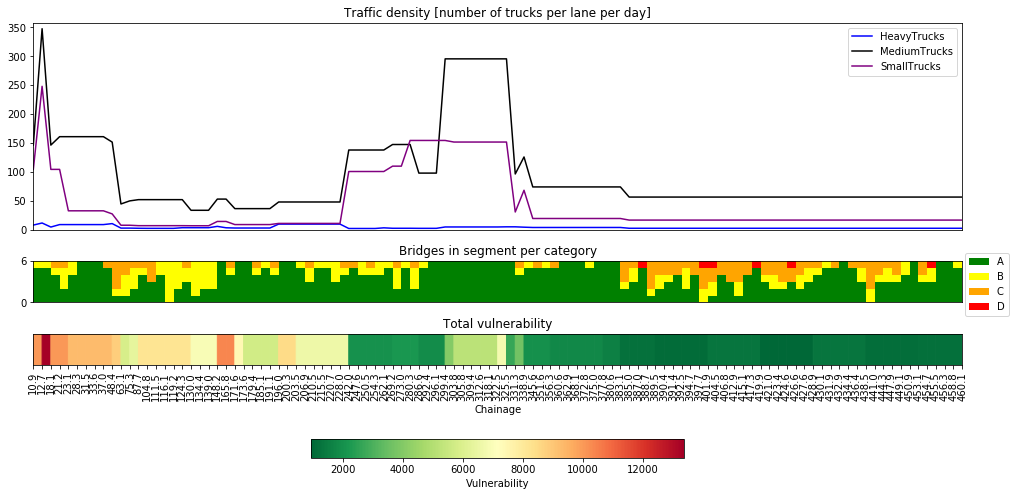

In [17]:
# Depending on the choices made by the user, select the right csv file and data

if detail == 'high':
    vulnerability_data = pd.read_csv('vulnerabilityroad'+str(roadId)+'.csv')
    condition = vulnerability_data['condition'].tolist()
    num_A = []
    num_B = []
    num_C = []
    num_D = []
    for item in condition:
        if item == 'A':
            num_A.append(1)
            num_B.append(0)
            num_C.append(0)
            num_D.append(0)
        elif item == 'B':
            num_A.append(0)
            num_B.append(1)
            num_C.append(0)
            num_D.append(0)
        elif item == 'C':
            num_A.append(0)
            num_B.append(0)
            num_C.append(1)
            num_D.append(0)
        elif item == 'D':
            num_A.append(0)
            num_B.append(0)
            num_C.append(0)
            num_D.append(1)        
    vulnerability_data['NumberOfABridges'] = num_A
    vulnerability_data['NumberOfBBridges'] = num_B
    vulnerability_data['NumberOfCBridges'] = num_C
    vulnerability_data['NumberOfDBridges'] = num_D  
    traffic = pd.read_csv('trafficperlane'+str(roadId)+'.csv')
    bridges = 1
else:
    vulnerability_data = pd.read_csv('vulnerabilitypersegment'+str(roadId)+'.csv')
    num_A = vulnerability_data['NumberOfABridges'].tolist()
    num_B = vulnerability_data['NumberOfBBridges'].tolist()
    num_C = vulnerability_data['NumberOfCBridges'].tolist()
    num_D = vulnerability_data['NumberOfDBridges'].tolist()
    traffic = pd.read_csv('trafficpersegment'+str(roadId)+'.csv')
    bridges = num_A[0]+num_B[0]+num_C[0]+num_D[0]
    
HeavyTrucks = traffic['heavyTruck'].tolist()
MediumTrucks = traffic['mediumTruck'].tolist()
SmallTrucks = traffic['smallTruck'].tolist()

economic_vulnerability = vulnerability_data['TotalEconomicVulnerability'].tolist()
chainage = vulnerability_data['chainage'].tolist()

road_segments = []
for segment in chainage:
    round_segment = round(segment,1)
    road_segments.append(round_segment)

# Based on user choices, define what visualisations to make    

if traffic_info == 'high':
    plot_vulnerability_detailed(road_segments,HeavyTrucks,MediumTrucks,SmallTrucks,economic_vulnerability,
                                    num_A,num_B,num_C,num_D,bridges)
    if detail == 'high':
        OutputDF = show_most_vulnerable(vulnerability_data,traffic,road_detail='high')
    else:
        OutputDF = show_most_vulnerable(vulnerability_data,traffic,road_detail='low')  
else:
    Cargo = []
    for i in range(len(HeavyTrucks)):
        cargo = HeavyTrucks[i]+MediumTrucks[i]+SmallTrucks[i]
        Cargo.append(cargo)
        
    plot_vulnerability_total(road_segments,Cargo,economic_vulnerability,num_A,num_B,num_C,num_D,bridges)
    if detail == 'high':
        OutputDF = show_most_vulnerable2(vulnerability_data,Cargo,road_detail='high')
    else:
        OutputDF = show_most_vulnerable2(vulnerability_data,Cargo,road_detail='low') 

print('The dataframe below shows the top 10 most vulnerable road segments of road '+str(roadId)+'.')
OutputDF        